# EikonalNet: 2D example

We first import the packages. Note when we import `models_tf`, we will import `tensorflow`. This code is written in tensorflow 1.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from models_tf import Eikonal2DnetCV2

W0225 14:28:18.280732 4686839232 module_wrapper.py:139] From /Users/fsc/Google Drive/Stanford/Research/NeuralNetworks/EikonalNet/models_tf.py:15: The name tf.random.set_random_seed is deprecated. Please use tf.compat.v1.random.set_random_seed instead.



We define a benchmark problem, which exactly satisfies the Eikonal equation and has a discontinuity in conduction velocity

In [3]:
def exact(X, Y):
    return np.minimum(np.sqrt(X**2 + Y**2), 0.7*np.sqrt((X - 1)**2 + (Y - 1)**2))

def CVexact(X, Y):
    mask = np.less_equal(np.sqrt(X**2 + Y**2), 0.7*np.sqrt((X - 1)**2 + (Y - 1)**2))
    return mask*1.0 + ~mask*1.0/0.7

Now we generate a grid to show the exact solution and also some training points and plot them

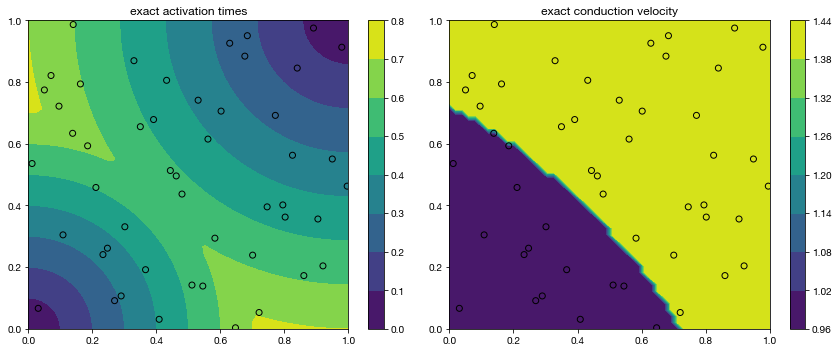

In [16]:
N_grid = 50         
x = y = np.linspace(0,1,N_grid)[:,None]

N_train = 50

X_m, Y_m = np.meshgrid(x,y)
X = X_m.flatten()[:,None]
Y = Y_m.flatten()[:,None]
T = exact(X,Y)
CV = CVexact(X,Y)

X_train_all = lhs(2, N_train)
X_train = X_train_all[:,:1]
Y_train = X_train_all[:,1:]
T_train = exact(X_train, Y_train)

fig = plt.figure()
fig.set_size_inches((12,5))
plt.subplot(121)
plt.contourf(X_m, Y_m, T.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k') 
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('exact activation times')

plt.subplot(122)
plt.contourf(X_m, Y_m, CV.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k') 
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('exact conduction velocity')
     
plt.tight_layout()


We define the architecture of the network, the collocation points for training and some parameters:

In [20]:
layers = [2,20,20,20,20,20,1]
CVlayers = [2,5,5,5,5,1]

# collocation points
X_pde = X
Y_pde = Y

# maximum value for the conduction velocity
CVmax = 1.5

model = Eikonal2DnetCV2(X_pde, Y_pde, X_train, Y_train, T_train, 
                        layers,CVlayers, C = CVmax, alpha = 1e-7, alphaL2 = 1e-9)
    

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



We train the model first with ADAM and then we finalize with BFGS

In [18]:
model.train_Adam_minibatch(50000, size = 100)
model.train() # BFGS training

It: 0, Loss: 2.717e+00, C: 4.482, Time: 1.27
It: 10, Loss: 8.794e-01, C: 4.482, Time: 0.03
It: 20, Loss: 4.381e-01, C: 4.482, Time: 0.03
It: 30, Loss: 4.092e-01, C: 4.482, Time: 0.03
It: 40, Loss: 3.336e-01, C: 4.482, Time: 0.03
It: 50, Loss: 2.726e-01, C: 4.482, Time: 0.03
It: 60, Loss: 2.491e-01, C: 4.482, Time: 0.03
It: 70, Loss: 2.188e-01, C: 4.482, Time: 0.03
It: 80, Loss: 2.061e-01, C: 4.482, Time: 0.03
It: 90, Loss: 1.908e-01, C: 4.482, Time: 0.03
It: 100, Loss: 1.833e-01, C: 4.482, Time: 0.04
It: 110, Loss: 1.739e-01, C: 4.482, Time: 0.03
It: 120, Loss: 1.616e-01, C: 4.482, Time: 0.03
It: 130, Loss: 1.529e-01, C: 4.482, Time: 0.03
It: 140, Loss: 1.451e-01, C: 4.482, Time: 0.03
It: 150, Loss: 1.397e-01, C: 4.482, Time: 0.03
It: 160, Loss: 1.338e-01, C: 4.482, Time: 0.03
It: 170, Loss: 1.292e-01, C: 4.482, Time: 0.04
It: 180, Loss: 1.251e-01, C: 4.482, Time: 0.03
It: 190, Loss: 1.199e-01, C: 4.482, Time: 0.03
It: 200, Loss: 1.160e-01, C: 4.482, Time: 0.03
It: 210, Loss: 1.115e-01

It: 1770, Loss: 2.901e-02, C: 4.482, Time: 0.03
It: 1780, Loss: 2.815e-02, C: 4.482, Time: 0.03
It: 1790, Loss: 2.918e-02, C: 4.482, Time: 0.03
It: 1800, Loss: 2.910e-02, C: 4.482, Time: 0.03
It: 1810, Loss: 2.846e-02, C: 4.482, Time: 0.03
It: 1820, Loss: 2.904e-02, C: 4.482, Time: 0.03
It: 1830, Loss: 2.901e-02, C: 4.482, Time: 0.03
It: 1840, Loss: 2.799e-02, C: 4.482, Time: 0.03
It: 1850, Loss: 2.827e-02, C: 4.482, Time: 0.03
It: 1860, Loss: 2.911e-02, C: 4.482, Time: 0.03
It: 1870, Loss: 2.883e-02, C: 4.482, Time: 0.03
It: 1880, Loss: 2.906e-02, C: 4.482, Time: 0.03
It: 1890, Loss: 2.759e-02, C: 4.482, Time: 0.03
It: 1900, Loss: 2.763e-02, C: 4.482, Time: 0.03
It: 1910, Loss: 2.772e-02, C: 4.482, Time: 0.03
It: 1920, Loss: 2.867e-02, C: 4.482, Time: 0.03
It: 1930, Loss: 2.803e-02, C: 4.482, Time: 0.03
It: 1940, Loss: 2.928e-02, C: 4.482, Time: 0.03
It: 1950, Loss: 2.777e-02, C: 4.482, Time: 0.03
It: 1960, Loss: 2.795e-02, C: 4.482, Time: 0.03
It: 1970, Loss: 2.667e-02, C: 4.482, Tim

It: 3520, Loss: 1.180e-02, C: 4.482, Time: 0.03
It: 3530, Loss: 1.328e-02, C: 4.482, Time: 0.03
It: 3540, Loss: 1.384e-02, C: 4.482, Time: 0.03
It: 3550, Loss: 2.073e-02, C: 4.482, Time: 0.03
It: 3560, Loss: 1.635e-02, C: 4.482, Time: 0.03
It: 3570, Loss: 1.789e-02, C: 4.482, Time: 0.03
It: 3580, Loss: 1.185e-02, C: 4.482, Time: 0.03
It: 3590, Loss: 1.488e-02, C: 4.482, Time: 0.03
It: 3600, Loss: 1.777e-02, C: 4.482, Time: 0.03
It: 3610, Loss: 1.632e-02, C: 4.482, Time: 0.03
It: 3620, Loss: 1.496e-02, C: 4.482, Time: 0.03
It: 3630, Loss: 1.352e-02, C: 4.482, Time: 0.03
It: 3640, Loss: 1.156e-02, C: 4.482, Time: 0.03
It: 3650, Loss: 1.292e-02, C: 4.482, Time: 0.03
It: 3660, Loss: 1.253e-02, C: 4.482, Time: 0.03
It: 3670, Loss: 9.945e-03, C: 4.482, Time: 0.03
It: 3680, Loss: 1.042e-02, C: 4.482, Time: 0.03
It: 3690, Loss: 1.385e-02, C: 4.482, Time: 0.03
It: 3700, Loss: 1.104e-02, C: 4.482, Time: 0.04
It: 3710, Loss: 1.601e-02, C: 4.482, Time: 0.03
It: 3720, Loss: 1.090e-02, C: 4.482, Tim

It: 5270, Loss: 7.215e-03, C: 4.482, Time: 0.03
It: 5280, Loss: 6.415e-03, C: 4.482, Time: 0.03
It: 5290, Loss: 6.574e-03, C: 4.482, Time: 0.03
It: 5300, Loss: 8.568e-03, C: 4.482, Time: 0.03
It: 5310, Loss: 7.355e-03, C: 4.482, Time: 0.03
It: 5320, Loss: 6.277e-03, C: 4.482, Time: 0.03
It: 5330, Loss: 8.406e-03, C: 4.482, Time: 0.03
It: 5340, Loss: 7.585e-03, C: 4.482, Time: 0.03
It: 5350, Loss: 8.834e-03, C: 4.482, Time: 0.03
It: 5360, Loss: 8.862e-03, C: 4.482, Time: 0.03
It: 5370, Loss: 8.015e-03, C: 4.482, Time: 0.03
It: 5380, Loss: 6.615e-03, C: 4.482, Time: 0.03
It: 5390, Loss: 9.565e-03, C: 4.482, Time: 0.03
It: 5400, Loss: 7.995e-03, C: 4.482, Time: 0.03
It: 5410, Loss: 6.193e-03, C: 4.482, Time: 0.03
It: 5420, Loss: 5.730e-03, C: 4.482, Time: 0.03
It: 5430, Loss: 5.327e-03, C: 4.482, Time: 0.03
It: 5440, Loss: 5.299e-03, C: 4.482, Time: 0.03
It: 5450, Loss: 9.128e-03, C: 4.482, Time: 0.03
It: 5460, Loss: 9.040e-03, C: 4.482, Time: 0.03
It: 5470, Loss: 6.015e-03, C: 4.482, Tim

It: 6980, Loss: 5.638e-03, C: 4.482, Time: 0.04
It: 6990, Loss: 5.164e-03, C: 4.482, Time: 0.03
It: 7000, Loss: 5.095e-03, C: 4.482, Time: 0.03
It: 7010, Loss: 4.670e-03, C: 4.482, Time: 0.03
It: 7020, Loss: 5.209e-03, C: 4.482, Time: 0.03
It: 7030, Loss: 6.953e-03, C: 4.482, Time: 0.03
It: 7040, Loss: 5.262e-03, C: 4.482, Time: 0.03
It: 7050, Loss: 5.319e-03, C: 4.482, Time: 0.04
It: 7060, Loss: 5.493e-03, C: 4.482, Time: 0.04
It: 7070, Loss: 6.798e-03, C: 4.482, Time: 0.03
It: 7080, Loss: 5.253e-03, C: 4.482, Time: 0.03
It: 7090, Loss: 4.408e-03, C: 4.482, Time: 0.03
It: 7100, Loss: 5.171e-03, C: 4.482, Time: 0.04
It: 7110, Loss: 6.738e-03, C: 4.482, Time: 0.04
It: 7120, Loss: 7.239e-03, C: 4.482, Time: 0.03
It: 7130, Loss: 7.094e-03, C: 4.482, Time: 0.03
It: 7140, Loss: 6.518e-03, C: 4.482, Time: 0.03
It: 7150, Loss: 6.476e-03, C: 4.482, Time: 0.03
It: 7160, Loss: 4.854e-03, C: 4.482, Time: 0.04
It: 7170, Loss: 5.524e-03, C: 4.482, Time: 0.04
It: 7180, Loss: 6.465e-03, C: 4.482, Tim

It: 8690, Loss: 5.456e-03, C: 4.482, Time: 0.03
It: 8700, Loss: 6.707e-03, C: 4.482, Time: 0.03
It: 8710, Loss: 4.730e-03, C: 4.482, Time: 0.03
It: 8720, Loss: 4.973e-03, C: 4.482, Time: 0.03
It: 8730, Loss: 5.564e-03, C: 4.482, Time: 0.03
It: 8740, Loss: 6.852e-03, C: 4.482, Time: 0.03
It: 8750, Loss: 5.892e-03, C: 4.482, Time: 0.03
It: 8760, Loss: 4.028e-03, C: 4.482, Time: 0.04
It: 8770, Loss: 5.176e-03, C: 4.482, Time: 0.03
It: 8780, Loss: 5.074e-03, C: 4.482, Time: 0.03
It: 8790, Loss: 5.075e-03, C: 4.482, Time: 0.03
It: 8800, Loss: 4.183e-03, C: 4.482, Time: 0.03
It: 8810, Loss: 5.228e-03, C: 4.482, Time: 0.03
It: 8820, Loss: 4.791e-03, C: 4.482, Time: 0.03
It: 8830, Loss: 4.296e-03, C: 4.482, Time: 0.03
It: 8840, Loss: 4.763e-03, C: 4.482, Time: 0.03
It: 8850, Loss: 4.066e-03, C: 4.482, Time: 0.03
It: 8860, Loss: 4.639e-03, C: 4.482, Time: 0.03
It: 8870, Loss: 5.909e-03, C: 4.482, Time: 0.03
It: 8880, Loss: 7.413e-03, C: 4.482, Time: 0.03
It: 8890, Loss: 4.353e-03, C: 4.482, Tim

It: 10390, Loss: 4.128e-03, C: 4.482, Time: 0.03
It: 10400, Loss: 4.459e-03, C: 4.482, Time: 0.03
It: 10410, Loss: 7.812e-03, C: 4.482, Time: 0.03
It: 10420, Loss: 4.701e-03, C: 4.482, Time: 0.03
It: 10430, Loss: 4.327e-03, C: 4.482, Time: 0.03
It: 10440, Loss: 3.947e-03, C: 4.482, Time: 0.03
It: 10450, Loss: 7.363e-03, C: 4.482, Time: 0.03
It: 10460, Loss: 5.296e-03, C: 4.482, Time: 0.03
It: 10470, Loss: 5.338e-03, C: 4.482, Time: 0.03
It: 10480, Loss: 4.771e-03, C: 4.482, Time: 0.03
It: 10490, Loss: 5.487e-03, C: 4.482, Time: 0.03
It: 10500, Loss: 4.140e-03, C: 4.482, Time: 0.03
It: 10510, Loss: 5.191e-03, C: 4.482, Time: 0.03
It: 10520, Loss: 4.003e-03, C: 4.482, Time: 0.03
It: 10530, Loss: 4.294e-03, C: 4.482, Time: 0.03
It: 10540, Loss: 4.430e-03, C: 4.482, Time: 0.03
It: 10550, Loss: 3.905e-03, C: 4.482, Time: 0.03
It: 10560, Loss: 5.391e-03, C: 4.482, Time: 0.03
It: 10570, Loss: 4.505e-03, C: 4.482, Time: 0.03
It: 10580, Loss: 4.818e-03, C: 4.482, Time: 0.03
It: 10590, Loss: 7.0

It: 12120, Loss: 3.955e-03, C: 4.482, Time: 0.03
It: 12130, Loss: 4.150e-03, C: 4.482, Time: 0.03
It: 12140, Loss: 3.662e-03, C: 4.482, Time: 0.03
It: 12150, Loss: 7.063e-03, C: 4.482, Time: 0.03
It: 12160, Loss: 3.945e-03, C: 4.482, Time: 0.03
It: 12170, Loss: 3.453e-03, C: 4.482, Time: 0.03
It: 12180, Loss: 5.552e-03, C: 4.482, Time: 0.03
It: 12190, Loss: 3.401e-03, C: 4.482, Time: 0.03
It: 12200, Loss: 4.221e-03, C: 4.482, Time: 0.03
It: 12210, Loss: 3.830e-03, C: 4.482, Time: 0.03
It: 12220, Loss: 3.508e-03, C: 4.482, Time: 0.03
It: 12230, Loss: 4.783e-03, C: 4.482, Time: 0.03
It: 12240, Loss: 5.733e-03, C: 4.482, Time: 0.03
It: 12250, Loss: 3.785e-03, C: 4.482, Time: 0.03
It: 12260, Loss: 3.881e-03, C: 4.482, Time: 0.03
It: 12270, Loss: 4.371e-03, C: 4.482, Time: 0.03
It: 12280, Loss: 3.486e-03, C: 4.482, Time: 0.04
It: 12290, Loss: 3.535e-03, C: 4.482, Time: 0.04
It: 12300, Loss: 2.863e-03, C: 4.482, Time: 0.03
It: 12310, Loss: 3.102e-03, C: 4.482, Time: 0.03
It: 12320, Loss: 3.3

It: 13830, Loss: 3.120e-03, C: 4.482, Time: 0.04
It: 13840, Loss: 2.212e-03, C: 4.482, Time: 0.03
It: 13850, Loss: 2.980e-03, C: 4.482, Time: 0.04
It: 13860, Loss: 3.279e-03, C: 4.482, Time: 0.03
It: 13870, Loss: 2.468e-03, C: 4.482, Time: 0.03
It: 13880, Loss: 2.631e-03, C: 4.482, Time: 0.03
It: 13890, Loss: 3.295e-03, C: 4.482, Time: 0.04
It: 13900, Loss: 5.117e-03, C: 4.482, Time: 0.03
It: 13910, Loss: 3.251e-03, C: 4.482, Time: 0.03
It: 13920, Loss: 2.482e-03, C: 4.482, Time: 0.03
It: 13930, Loss: 3.453e-03, C: 4.482, Time: 0.04
It: 13940, Loss: 3.652e-03, C: 4.482, Time: 0.03
It: 13950, Loss: 3.898e-03, C: 4.482, Time: 0.04
It: 13960, Loss: 2.974e-03, C: 4.482, Time: 0.03
It: 13970, Loss: 3.980e-03, C: 4.482, Time: 0.03
It: 13980, Loss: 2.276e-03, C: 4.482, Time: 0.04
It: 13990, Loss: 2.811e-03, C: 4.482, Time: 0.03
It: 14000, Loss: 2.258e-03, C: 4.482, Time: 0.03
It: 14010, Loss: 2.472e-03, C: 4.482, Time: 0.03
It: 14020, Loss: 3.490e-03, C: 4.482, Time: 0.03
It: 14030, Loss: 4.2

It: 15560, Loss: 2.090e-03, C: 4.482, Time: 0.04
It: 15570, Loss: 2.331e-03, C: 4.482, Time: 0.04
It: 15580, Loss: 2.476e-03, C: 4.482, Time: 0.03
It: 15590, Loss: 2.582e-03, C: 4.482, Time: 0.03
It: 15600, Loss: 2.165e-03, C: 4.482, Time: 0.03
It: 15610, Loss: 2.012e-03, C: 4.482, Time: 0.03
It: 15620, Loss: 2.507e-03, C: 4.482, Time: 0.03
It: 15630, Loss: 4.013e-03, C: 4.482, Time: 0.03
It: 15640, Loss: 2.936e-03, C: 4.482, Time: 0.03
It: 15650, Loss: 2.263e-03, C: 4.482, Time: 0.03
It: 15660, Loss: 2.615e-03, C: 4.482, Time: 0.03
It: 15670, Loss: 1.849e-03, C: 4.482, Time: 0.03
It: 15680, Loss: 2.957e-03, C: 4.482, Time: 0.03
It: 15690, Loss: 2.518e-03, C: 4.482, Time: 0.03
It: 15700, Loss: 2.051e-03, C: 4.482, Time: 0.03
It: 15710, Loss: 2.633e-03, C: 4.482, Time: 0.03
It: 15720, Loss: 3.637e-03, C: 4.482, Time: 0.03
It: 15730, Loss: 3.946e-03, C: 4.482, Time: 0.03
It: 15740, Loss: 2.159e-03, C: 4.482, Time: 0.03
It: 15750, Loss: 3.204e-03, C: 4.482, Time: 0.03
It: 15760, Loss: 3.6

It: 17240, Loss: 2.110e-03, C: 4.482, Time: 0.03
It: 17250, Loss: 2.610e-03, C: 4.482, Time: 0.03
It: 17260, Loss: 1.740e-03, C: 4.482, Time: 0.04
It: 17270, Loss: 3.208e-03, C: 4.482, Time: 0.03
It: 17280, Loss: 2.132e-03, C: 4.482, Time: 0.03
It: 17290, Loss: 2.344e-03, C: 4.482, Time: 0.03
It: 17300, Loss: 2.096e-03, C: 4.482, Time: 0.03
It: 17310, Loss: 2.106e-03, C: 4.482, Time: 0.03
It: 17320, Loss: 2.352e-03, C: 4.482, Time: 0.03
It: 17330, Loss: 1.578e-03, C: 4.482, Time: 0.04
It: 17340, Loss: 2.212e-03, C: 4.482, Time: 0.03
It: 17350, Loss: 2.828e-03, C: 4.482, Time: 0.03
It: 17360, Loss: 2.156e-03, C: 4.482, Time: 0.03
It: 17370, Loss: 1.648e-03, C: 4.482, Time: 0.03
It: 17380, Loss: 1.856e-03, C: 4.482, Time: 0.03
It: 17390, Loss: 3.581e-03, C: 4.482, Time: 0.03
It: 17400, Loss: 1.553e-03, C: 4.482, Time: 0.03
It: 17410, Loss: 2.557e-03, C: 4.482, Time: 0.04
It: 17420, Loss: 1.680e-03, C: 4.482, Time: 0.04
It: 17430, Loss: 2.881e-03, C: 4.482, Time: 0.04
It: 17440, Loss: 2.8

It: 18920, Loss: 1.695e-03, C: 4.482, Time: 0.04
It: 18930, Loss: 1.283e-03, C: 4.482, Time: 0.03
It: 18940, Loss: 2.761e-03, C: 4.482, Time: 0.03
It: 18950, Loss: 1.283e-03, C: 4.482, Time: 0.04
It: 18960, Loss: 2.546e-03, C: 4.482, Time: 0.03
It: 18970, Loss: 2.216e-03, C: 4.482, Time: 0.03
It: 18980, Loss: 2.437e-03, C: 4.482, Time: 0.04
It: 18990, Loss: 1.940e-03, C: 4.482, Time: 0.04
It: 19000, Loss: 2.480e-03, C: 4.482, Time: 0.03
It: 19010, Loss: 1.550e-03, C: 4.482, Time: 0.03
It: 19020, Loss: 1.894e-03, C: 4.482, Time: 0.03
It: 19030, Loss: 1.994e-03, C: 4.482, Time: 0.03
It: 19040, Loss: 2.081e-03, C: 4.482, Time: 0.03
It: 19050, Loss: 1.083e-03, C: 4.482, Time: 0.03
It: 19060, Loss: 1.459e-03, C: 4.482, Time: 0.03
It: 19070, Loss: 1.453e-03, C: 4.482, Time: 0.03
It: 19080, Loss: 2.155e-03, C: 4.482, Time: 0.03
It: 19090, Loss: 2.200e-03, C: 4.482, Time: 0.03
It: 19100, Loss: 8.998e-04, C: 4.482, Time: 0.03
It: 19110, Loss: 3.580e-03, C: 4.482, Time: 0.03
It: 19120, Loss: 2.1

It: 20600, Loss: 1.213e-03, C: 4.482, Time: 0.04
It: 20610, Loss: 2.122e-03, C: 4.482, Time: 0.04
It: 20620, Loss: 7.427e-04, C: 4.482, Time: 0.03
It: 20630, Loss: 1.424e-03, C: 4.482, Time: 0.04
It: 20640, Loss: 2.237e-03, C: 4.482, Time: 0.04
It: 20650, Loss: 1.399e-03, C: 4.482, Time: 0.04
It: 20660, Loss: 1.607e-03, C: 4.482, Time: 0.03
It: 20670, Loss: 2.290e-03, C: 4.482, Time: 0.04
It: 20680, Loss: 3.441e-03, C: 4.482, Time: 0.04
It: 20690, Loss: 1.045e-03, C: 4.482, Time: 0.04
It: 20700, Loss: 1.051e-03, C: 4.482, Time: 0.03
It: 20710, Loss: 1.295e-03, C: 4.482, Time: 0.04
It: 20720, Loss: 1.644e-03, C: 4.482, Time: 0.04
It: 20730, Loss: 1.250e-03, C: 4.482, Time: 0.04
It: 20740, Loss: 6.127e-04, C: 4.482, Time: 0.03
It: 20750, Loss: 1.285e-03, C: 4.482, Time: 0.03
It: 20760, Loss: 1.143e-03, C: 4.482, Time: 0.03
It: 20770, Loss: 1.518e-03, C: 4.482, Time: 0.03
It: 20780, Loss: 1.241e-03, C: 4.482, Time: 0.03
It: 20790, Loss: 6.065e-04, C: 4.482, Time: 0.04
It: 20800, Loss: 1.6

It: 22290, Loss: 1.144e-03, C: 4.482, Time: 0.04
It: 22300, Loss: 7.127e-04, C: 4.482, Time: 0.04
It: 22310, Loss: 6.082e-04, C: 4.482, Time: 0.04
It: 22320, Loss: 6.554e-04, C: 4.482, Time: 0.04
It: 22330, Loss: 1.499e-03, C: 4.482, Time: 0.04
It: 22340, Loss: 9.976e-04, C: 4.482, Time: 0.04
It: 22350, Loss: 1.513e-03, C: 4.482, Time: 0.04
It: 22360, Loss: 7.987e-04, C: 4.482, Time: 0.04
It: 22370, Loss: 1.713e-03, C: 4.482, Time: 0.04
It: 22380, Loss: 1.630e-03, C: 4.482, Time: 0.04
It: 22390, Loss: 1.021e-03, C: 4.482, Time: 0.03
It: 22400, Loss: 8.019e-04, C: 4.482, Time: 0.04
It: 22410, Loss: 1.596e-03, C: 4.482, Time: 0.04
It: 22420, Loss: 1.748e-03, C: 4.482, Time: 0.03
It: 22430, Loss: 9.184e-04, C: 4.482, Time: 0.03
It: 22440, Loss: 2.356e-03, C: 4.482, Time: 0.03
It: 22450, Loss: 1.489e-03, C: 4.482, Time: 0.03
It: 22460, Loss: 1.977e-03, C: 4.482, Time: 0.03
It: 22470, Loss: 2.381e-03, C: 4.482, Time: 0.04
It: 22480, Loss: 6.351e-04, C: 4.482, Time: 0.03
It: 22490, Loss: 1.0

It: 23970, Loss: 6.090e-04, C: 4.482, Time: 0.03
It: 23980, Loss: 8.641e-04, C: 4.482, Time: 0.04
It: 23990, Loss: 1.608e-03, C: 4.482, Time: 0.03
It: 24000, Loss: 7.698e-04, C: 4.482, Time: 0.04
It: 24010, Loss: 7.639e-04, C: 4.482, Time: 0.03
It: 24020, Loss: 1.464e-03, C: 4.482, Time: 0.03
It: 24030, Loss: 9.178e-04, C: 4.482, Time: 0.03
It: 24040, Loss: 5.195e-04, C: 4.482, Time: 0.04
It: 24050, Loss: 2.566e-03, C: 4.482, Time: 0.04
It: 24060, Loss: 1.124e-03, C: 4.482, Time: 0.04
It: 24070, Loss: 2.388e-03, C: 4.482, Time: 0.03
It: 24080, Loss: 1.469e-03, C: 4.482, Time: 0.03
It: 24090, Loss: 8.607e-04, C: 4.482, Time: 0.04
It: 24100, Loss: 8.203e-04, C: 4.482, Time: 0.04
It: 24110, Loss: 1.872e-03, C: 4.482, Time: 0.03
It: 24120, Loss: 7.057e-04, C: 4.482, Time: 0.03
It: 24130, Loss: 1.015e-03, C: 4.482, Time: 0.03
It: 24140, Loss: 1.957e-03, C: 4.482, Time: 0.03
It: 24150, Loss: 1.355e-03, C: 4.482, Time: 0.03
It: 24160, Loss: 1.149e-03, C: 4.482, Time: 0.04
It: 24170, Loss: 1.0

It: 25650, Loss: 1.006e-03, C: 4.482, Time: 0.04
It: 25660, Loss: 1.800e-03, C: 4.482, Time: 0.04
It: 25670, Loss: 1.149e-03, C: 4.482, Time: 0.04
It: 25680, Loss: 2.456e-03, C: 4.482, Time: 0.04
It: 25690, Loss: 2.906e-03, C: 4.482, Time: 0.04
It: 25700, Loss: 1.245e-03, C: 4.482, Time: 0.03
It: 25710, Loss: 1.563e-03, C: 4.482, Time: 0.03
It: 25720, Loss: 2.097e-03, C: 4.482, Time: 0.04
It: 25730, Loss: 8.286e-04, C: 4.482, Time: 0.03
It: 25740, Loss: 7.910e-04, C: 4.482, Time: 0.03
It: 25750, Loss: 5.440e-04, C: 4.482, Time: 0.04
It: 25760, Loss: 7.975e-04, C: 4.482, Time: 0.03
It: 25770, Loss: 8.475e-04, C: 4.482, Time: 0.03
It: 25780, Loss: 1.969e-03, C: 4.482, Time: 0.04
It: 25790, Loss: 8.220e-04, C: 4.482, Time: 0.03
It: 25800, Loss: 7.499e-04, C: 4.482, Time: 0.03
It: 25810, Loss: 7.145e-04, C: 4.482, Time: 0.04
It: 25820, Loss: 1.014e-03, C: 4.482, Time: 0.03
It: 25830, Loss: 1.343e-03, C: 4.482, Time: 0.03
It: 25840, Loss: 5.533e-04, C: 4.482, Time: 0.03
It: 25850, Loss: 9.7

It: 27340, Loss: 6.852e-04, C: 4.482, Time: 0.03
It: 27350, Loss: 8.863e-04, C: 4.482, Time: 0.04
It: 27360, Loss: 9.565e-04, C: 4.482, Time: 0.03
It: 27370, Loss: 1.117e-03, C: 4.482, Time: 0.03
It: 27380, Loss: 1.166e-03, C: 4.482, Time: 0.03
It: 27390, Loss: 1.980e-03, C: 4.482, Time: 0.04
It: 27400, Loss: 8.612e-04, C: 4.482, Time: 0.04
It: 27410, Loss: 4.856e-04, C: 4.482, Time: 0.04
It: 27420, Loss: 1.689e-03, C: 4.482, Time: 0.03
It: 27430, Loss: 9.178e-04, C: 4.482, Time: 0.04
It: 27440, Loss: 6.287e-04, C: 4.482, Time: 0.03
It: 27450, Loss: 2.253e-03, C: 4.482, Time: 0.03
It: 27460, Loss: 9.306e-04, C: 4.482, Time: 0.04
It: 27470, Loss: 1.580e-03, C: 4.482, Time: 0.03
It: 27480, Loss: 8.763e-04, C: 4.482, Time: 0.03
It: 27490, Loss: 1.923e-03, C: 4.482, Time: 0.03
It: 27500, Loss: 1.515e-03, C: 4.482, Time: 0.04
It: 27510, Loss: 1.197e-03, C: 4.482, Time: 0.03
It: 27520, Loss: 1.252e-03, C: 4.482, Time: 0.04
It: 27530, Loss: 1.004e-03, C: 4.482, Time: 0.04
It: 27540, Loss: 1.0

It: 29020, Loss: 6.268e-04, C: 4.482, Time: 0.03
It: 29030, Loss: 9.454e-04, C: 4.482, Time: 0.04
It: 29040, Loss: 8.093e-04, C: 4.482, Time: 0.03
It: 29050, Loss: 1.001e-03, C: 4.482, Time: 0.03
It: 29060, Loss: 6.524e-04, C: 4.482, Time: 0.03
It: 29070, Loss: 1.102e-03, C: 4.482, Time: 0.04
It: 29080, Loss: 6.364e-04, C: 4.482, Time: 0.04
It: 29090, Loss: 8.605e-04, C: 4.482, Time: 0.04
It: 29100, Loss: 1.370e-03, C: 4.482, Time: 0.04
It: 29110, Loss: 1.854e-03, C: 4.482, Time: 0.04
It: 29120, Loss: 1.553e-03, C: 4.482, Time: 0.04
It: 29130, Loss: 5.748e-04, C: 4.482, Time: 0.04
It: 29140, Loss: 1.111e-03, C: 4.482, Time: 0.03
It: 29150, Loss: 5.629e-04, C: 4.482, Time: 0.04
It: 29160, Loss: 5.806e-04, C: 4.482, Time: 0.03
It: 29170, Loss: 9.000e-04, C: 4.482, Time: 0.03
It: 29180, Loss: 2.030e-03, C: 4.482, Time: 0.03
It: 29190, Loss: 7.078e-04, C: 4.482, Time: 0.04
It: 29200, Loss: 1.252e-03, C: 4.482, Time: 0.04
It: 29210, Loss: 6.175e-04, C: 4.482, Time: 0.04
It: 29220, Loss: 1.7

It: 30700, Loss: 4.865e-04, C: 4.482, Time: 0.03
It: 30710, Loss: 9.614e-04, C: 4.482, Time: 0.03
It: 30720, Loss: 6.060e-04, C: 4.482, Time: 0.03
It: 30730, Loss: 4.920e-04, C: 4.482, Time: 0.03
It: 30740, Loss: 8.470e-04, C: 4.482, Time: 0.03
It: 30750, Loss: 5.866e-04, C: 4.482, Time: 0.03
It: 30760, Loss: 1.006e-03, C: 4.482, Time: 0.03
It: 30770, Loss: 1.507e-03, C: 4.482, Time: 0.03
It: 30780, Loss: 8.564e-04, C: 4.482, Time: 0.03
It: 30790, Loss: 1.632e-03, C: 4.482, Time: 0.03
It: 30800, Loss: 5.928e-04, C: 4.482, Time: 0.03
It: 30810, Loss: 7.472e-04, C: 4.482, Time: 0.03
It: 30820, Loss: 4.770e-04, C: 4.482, Time: 0.03
It: 30830, Loss: 9.252e-04, C: 4.482, Time: 0.04
It: 30840, Loss: 1.150e-03, C: 4.482, Time: 0.03
It: 30850, Loss: 1.750e-03, C: 4.482, Time: 0.04
It: 30860, Loss: 1.078e-03, C: 4.482, Time: 0.03
It: 30870, Loss: 7.438e-04, C: 4.482, Time: 0.03
It: 30880, Loss: 1.407e-03, C: 4.482, Time: 0.04
It: 30890, Loss: 1.164e-03, C: 4.482, Time: 0.03
It: 30900, Loss: 9.1

It: 32390, Loss: 6.474e-04, C: 4.482, Time: 0.04
It: 32400, Loss: 1.159e-03, C: 4.482, Time: 0.03
It: 32410, Loss: 5.807e-04, C: 4.482, Time: 0.03
It: 32420, Loss: 3.376e-04, C: 4.482, Time: 0.03
It: 32430, Loss: 5.363e-04, C: 4.482, Time: 0.04
It: 32440, Loss: 4.937e-04, C: 4.482, Time: 0.04
It: 32450, Loss: 1.041e-03, C: 4.482, Time: 0.04
It: 32460, Loss: 1.252e-03, C: 4.482, Time: 0.04
It: 32470, Loss: 4.784e-04, C: 4.482, Time: 0.04
It: 32480, Loss: 5.238e-04, C: 4.482, Time: 0.04
It: 32490, Loss: 8.483e-04, C: 4.482, Time: 0.03
It: 32500, Loss: 6.660e-04, C: 4.482, Time: 0.03
It: 32510, Loss: 4.691e-04, C: 4.482, Time: 0.04
It: 32520, Loss: 1.094e-03, C: 4.482, Time: 0.04
It: 32530, Loss: 8.494e-04, C: 4.482, Time: 0.03
It: 32540, Loss: 8.785e-04, C: 4.482, Time: 0.03
It: 32550, Loss: 1.730e-03, C: 4.482, Time: 0.04
It: 32560, Loss: 9.605e-04, C: 4.482, Time: 0.03
It: 32570, Loss: 7.992e-04, C: 4.482, Time: 0.04
It: 32580, Loss: 1.049e-03, C: 4.482, Time: 0.04
It: 32590, Loss: 1.7

It: 34070, Loss: 1.995e-03, C: 4.482, Time: 0.03
It: 34080, Loss: 1.056e-03, C: 4.482, Time: 0.03
It: 34090, Loss: 6.370e-04, C: 4.482, Time: 0.03
It: 34100, Loss: 8.706e-04, C: 4.482, Time: 0.03
It: 34110, Loss: 6.494e-04, C: 4.482, Time: 0.04
It: 34120, Loss: 1.528e-03, C: 4.482, Time: 0.03
It: 34130, Loss: 9.397e-04, C: 4.482, Time: 0.03
It: 34140, Loss: 5.388e-04, C: 4.482, Time: 0.03
It: 34150, Loss: 4.968e-04, C: 4.482, Time: 0.03
It: 34160, Loss: 1.621e-03, C: 4.482, Time: 0.04
It: 34170, Loss: 6.509e-04, C: 4.482, Time: 0.03
It: 34180, Loss: 1.125e-03, C: 4.482, Time: 0.03
It: 34190, Loss: 1.446e-03, C: 4.482, Time: 0.03
It: 34200, Loss: 7.486e-04, C: 4.482, Time: 0.03
It: 34210, Loss: 1.440e-03, C: 4.482, Time: 0.03
It: 34220, Loss: 1.324e-03, C: 4.482, Time: 0.03
It: 34230, Loss: 7.157e-04, C: 4.482, Time: 0.03
It: 34240, Loss: 1.180e-03, C: 4.482, Time: 0.03
It: 34250, Loss: 6.222e-04, C: 4.482, Time: 0.03
It: 34260, Loss: 5.467e-04, C: 4.482, Time: 0.03
It: 34270, Loss: 1.5

It: 35770, Loss: 6.566e-04, C: 4.482, Time: 0.03
It: 35780, Loss: 5.336e-04, C: 4.482, Time: 0.03
It: 35790, Loss: 4.924e-04, C: 4.482, Time: 0.03
It: 35800, Loss: 9.796e-04, C: 4.482, Time: 0.03
It: 35810, Loss: 9.293e-04, C: 4.482, Time: 0.04
It: 35820, Loss: 4.707e-04, C: 4.482, Time: 0.03
It: 35830, Loss: 4.828e-04, C: 4.482, Time: 0.03
It: 35840, Loss: 6.035e-04, C: 4.482, Time: 0.03
It: 35850, Loss: 7.403e-04, C: 4.482, Time: 0.03
It: 35860, Loss: 1.581e-03, C: 4.482, Time: 0.03
It: 35870, Loss: 9.395e-04, C: 4.482, Time: 0.03
It: 35880, Loss: 1.894e-03, C: 4.482, Time: 0.03
It: 35890, Loss: 6.438e-04, C: 4.482, Time: 0.04
It: 35900, Loss: 1.944e-03, C: 4.482, Time: 0.04
It: 35910, Loss: 7.775e-04, C: 4.482, Time: 0.03
It: 35920, Loss: 1.460e-03, C: 4.482, Time: 0.03
It: 35930, Loss: 4.859e-04, C: 4.482, Time: 0.03
It: 35940, Loss: 8.146e-04, C: 4.482, Time: 0.03
It: 35950, Loss: 5.879e-04, C: 4.482, Time: 0.03
It: 35960, Loss: 1.048e-03, C: 4.482, Time: 0.03
It: 35970, Loss: 8.9

It: 37450, Loss: 5.731e-04, C: 4.482, Time: 0.04
It: 37460, Loss: 9.134e-04, C: 4.482, Time: 0.03
It: 37470, Loss: 4.300e-04, C: 4.482, Time: 0.03
It: 37480, Loss: 7.154e-04, C: 4.482, Time: 0.03
It: 37490, Loss: 9.823e-04, C: 4.482, Time: 0.03
It: 37500, Loss: 5.113e-04, C: 4.482, Time: 0.03
It: 37510, Loss: 8.904e-04, C: 4.482, Time: 0.03
It: 37520, Loss: 6.361e-04, C: 4.482, Time: 0.03
It: 37530, Loss: 3.878e-04, C: 4.482, Time: 0.03
It: 37540, Loss: 9.425e-04, C: 4.482, Time: 0.03
It: 37550, Loss: 4.643e-04, C: 4.482, Time: 0.04
It: 37560, Loss: 5.546e-04, C: 4.482, Time: 0.03
It: 37570, Loss: 2.108e-03, C: 4.482, Time: 0.03
It: 37580, Loss: 2.679e-04, C: 4.482, Time: 0.03
It: 37590, Loss: 4.199e-04, C: 4.482, Time: 0.03
It: 37600, Loss: 6.436e-04, C: 4.482, Time: 0.03
It: 37610, Loss: 1.698e-03, C: 4.482, Time: 0.03
It: 37620, Loss: 5.229e-04, C: 4.482, Time: 0.04
It: 37630, Loss: 6.754e-04, C: 4.482, Time: 0.03
It: 37640, Loss: 6.801e-04, C: 4.482, Time: 0.03
It: 37650, Loss: 9.8

It: 39130, Loss: 1.524e-03, C: 4.482, Time: 0.04
It: 39140, Loss: 1.176e-03, C: 4.482, Time: 0.03
It: 39150, Loss: 1.818e-03, C: 4.482, Time: 0.03
It: 39160, Loss: 1.358e-03, C: 4.482, Time: 0.03
It: 39170, Loss: 5.479e-04, C: 4.482, Time: 0.03
It: 39180, Loss: 7.775e-04, C: 4.482, Time: 0.03
It: 39190, Loss: 6.705e-04, C: 4.482, Time: 0.04
It: 39200, Loss: 3.339e-04, C: 4.482, Time: 0.04
It: 39210, Loss: 1.638e-03, C: 4.482, Time: 0.03
It: 39220, Loss: 1.372e-03, C: 4.482, Time: 0.03
It: 39230, Loss: 6.839e-04, C: 4.482, Time: 0.03
It: 39240, Loss: 1.314e-03, C: 4.482, Time: 0.03
It: 39250, Loss: 1.487e-03, C: 4.482, Time: 0.04
It: 39260, Loss: 8.222e-04, C: 4.482, Time: 0.03
It: 39270, Loss: 3.250e-04, C: 4.482, Time: 0.03
It: 39280, Loss: 1.534e-03, C: 4.482, Time: 0.03
It: 39290, Loss: 1.015e-03, C: 4.482, Time: 0.03
It: 39300, Loss: 1.125e-03, C: 4.482, Time: 0.03
It: 39310, Loss: 1.686e-03, C: 4.482, Time: 0.03
It: 39320, Loss: 7.507e-04, C: 4.482, Time: 0.03
It: 39330, Loss: 3.9

It: 40820, Loss: 7.220e-04, C: 4.482, Time: 0.04
It: 40830, Loss: 6.162e-04, C: 4.482, Time: 0.04
It: 40840, Loss: 6.780e-04, C: 4.482, Time: 0.03
It: 40850, Loss: 4.419e-04, C: 4.482, Time: 0.03
It: 40860, Loss: 7.532e-04, C: 4.482, Time: 0.03
It: 40870, Loss: 1.250e-03, C: 4.482, Time: 0.03
It: 40880, Loss: 2.554e-03, C: 4.482, Time: 0.03
It: 40890, Loss: 1.025e-03, C: 4.482, Time: 0.03
It: 40900, Loss: 5.618e-04, C: 4.482, Time: 0.03
It: 40910, Loss: 3.148e-04, C: 4.482, Time: 0.03
It: 40920, Loss: 5.975e-04, C: 4.482, Time: 0.03
It: 40930, Loss: 3.508e-04, C: 4.482, Time: 0.04
It: 40940, Loss: 3.894e-04, C: 4.482, Time: 0.04
It: 40950, Loss: 3.308e-04, C: 4.482, Time: 0.04
It: 40960, Loss: 6.235e-04, C: 4.482, Time: 0.04
It: 40970, Loss: 5.611e-04, C: 4.482, Time: 0.03
It: 40980, Loss: 4.969e-04, C: 4.482, Time: 0.04
It: 40990, Loss: 7.471e-04, C: 4.482, Time: 0.03
It: 41000, Loss: 3.115e-04, C: 4.482, Time: 0.04
It: 41010, Loss: 5.578e-04, C: 4.482, Time: 0.04
It: 41020, Loss: 1.5

It: 42500, Loss: 8.603e-04, C: 4.482, Time: 0.03
It: 42510, Loss: 5.193e-04, C: 4.482, Time: 0.03
It: 42520, Loss: 1.169e-03, C: 4.482, Time: 0.03
It: 42530, Loss: 3.853e-04, C: 4.482, Time: 0.04
It: 42540, Loss: 9.139e-04, C: 4.482, Time: 0.03
It: 42550, Loss: 4.500e-04, C: 4.482, Time: 0.03
It: 42560, Loss: 4.567e-04, C: 4.482, Time: 0.03
It: 42570, Loss: 4.891e-04, C: 4.482, Time: 0.03
It: 42580, Loss: 3.110e-04, C: 4.482, Time: 0.03
It: 42590, Loss: 4.143e-04, C: 4.482, Time: 0.04
It: 42600, Loss: 3.820e-04, C: 4.482, Time: 0.03
It: 42610, Loss: 2.709e-04, C: 4.482, Time: 0.04
It: 42620, Loss: 6.286e-04, C: 4.482, Time: 0.03
It: 42630, Loss: 6.462e-04, C: 4.482, Time: 0.04
It: 42640, Loss: 8.398e-04, C: 4.482, Time: 0.03
It: 42650, Loss: 9.722e-04, C: 4.482, Time: 0.03
It: 42660, Loss: 5.196e-04, C: 4.482, Time: 0.03
It: 42670, Loss: 9.308e-04, C: 4.482, Time: 0.03
It: 42680, Loss: 6.690e-04, C: 4.482, Time: 0.03
It: 42690, Loss: 1.046e-03, C: 4.482, Time: 0.03
It: 42700, Loss: 5.5

It: 44180, Loss: 4.804e-04, C: 4.482, Time: 0.03
It: 44190, Loss: 8.604e-04, C: 4.482, Time: 0.03
It: 44200, Loss: 2.536e-04, C: 4.482, Time: 0.03
It: 44210, Loss: 2.348e-04, C: 4.482, Time: 0.03
It: 44220, Loss: 5.304e-04, C: 4.482, Time: 0.03
It: 44230, Loss: 7.148e-04, C: 4.482, Time: 0.03
It: 44240, Loss: 4.262e-04, C: 4.482, Time: 0.04
It: 44250, Loss: 4.080e-04, C: 4.482, Time: 0.03
It: 44260, Loss: 3.724e-04, C: 4.482, Time: 0.03
It: 44270, Loss: 7.757e-04, C: 4.482, Time: 0.03
It: 44280, Loss: 5.270e-04, C: 4.482, Time: 0.04
It: 44290, Loss: 7.154e-04, C: 4.482, Time: 0.03
It: 44300, Loss: 5.223e-04, C: 4.482, Time: 0.04
It: 44310, Loss: 7.805e-04, C: 4.482, Time: 0.03
It: 44320, Loss: 1.330e-03, C: 4.482, Time: 0.03
It: 44330, Loss: 2.572e-04, C: 4.482, Time: 0.03
It: 44340, Loss: 6.645e-04, C: 4.482, Time: 0.03
It: 44350, Loss: 1.232e-03, C: 4.482, Time: 0.03
It: 44360, Loss: 3.235e-04, C: 4.482, Time: 0.04
It: 44370, Loss: 5.668e-04, C: 4.482, Time: 0.04
It: 44380, Loss: 1.1

It: 45860, Loss: 3.446e-04, C: 4.482, Time: 0.04
It: 45870, Loss: 2.447e-04, C: 4.482, Time: 0.04
It: 45880, Loss: 5.039e-04, C: 4.482, Time: 0.03
It: 45890, Loss: 3.351e-04, C: 4.482, Time: 0.03
It: 45900, Loss: 1.167e-03, C: 4.482, Time: 0.03
It: 45910, Loss: 5.817e-04, C: 4.482, Time: 0.03
It: 45920, Loss: 1.208e-03, C: 4.482, Time: 0.03
It: 45930, Loss: 4.860e-04, C: 4.482, Time: 0.04
It: 45940, Loss: 9.325e-04, C: 4.482, Time: 0.03
It: 45950, Loss: 5.570e-04, C: 4.482, Time: 0.03
It: 45960, Loss: 6.951e-04, C: 4.482, Time: 0.04
It: 45970, Loss: 5.410e-04, C: 4.482, Time: 0.03
It: 45980, Loss: 4.612e-04, C: 4.482, Time: 0.03
It: 45990, Loss: 3.486e-04, C: 4.482, Time: 0.03
It: 46000, Loss: 6.890e-04, C: 4.482, Time: 0.03
It: 46010, Loss: 8.183e-04, C: 4.482, Time: 0.04
It: 46020, Loss: 5.919e-04, C: 4.482, Time: 0.03
It: 46030, Loss: 3.861e-04, C: 4.482, Time: 0.03
It: 46040, Loss: 4.250e-04, C: 4.482, Time: 0.03
It: 46050, Loss: 3.702e-04, C: 4.482, Time: 0.03
It: 46060, Loss: 3.1

It: 47540, Loss: 6.810e-04, C: 4.482, Time: 0.04
It: 47550, Loss: 1.455e-03, C: 4.482, Time: 0.03
It: 47560, Loss: 8.186e-04, C: 4.482, Time: 0.03
It: 47570, Loss: 1.243e-03, C: 4.482, Time: 0.03
It: 47580, Loss: 8.192e-04, C: 4.482, Time: 0.03
It: 47590, Loss: 1.168e-03, C: 4.482, Time: 0.03
It: 47600, Loss: 4.840e-04, C: 4.482, Time: 0.03
It: 47610, Loss: 1.538e-03, C: 4.482, Time: 0.03
It: 47620, Loss: 8.976e-04, C: 4.482, Time: 0.03
It: 47630, Loss: 5.613e-04, C: 4.482, Time: 0.04
It: 47640, Loss: 3.964e-04, C: 4.482, Time: 0.03
It: 47650, Loss: 3.488e-04, C: 4.482, Time: 0.03
It: 47660, Loss: 3.607e-04, C: 4.482, Time: 0.03
It: 47670, Loss: 3.247e-03, C: 4.482, Time: 0.03
It: 47680, Loss: 4.707e-04, C: 4.482, Time: 0.04
It: 47690, Loss: 1.003e-03, C: 4.482, Time: 0.04
It: 47700, Loss: 8.826e-04, C: 4.482, Time: 0.03
It: 47710, Loss: 9.863e-04, C: 4.482, Time: 0.03
It: 47720, Loss: 4.883e-04, C: 4.482, Time: 0.03
It: 47730, Loss: 1.007e-03, C: 4.482, Time: 0.04
It: 47740, Loss: 6.5

It: 49220, Loss: 1.580e-03, C: 4.482, Time: 0.03
It: 49230, Loss: 6.790e-04, C: 4.482, Time: 0.04
It: 49240, Loss: 1.603e-03, C: 4.482, Time: 0.03
It: 49250, Loss: 1.018e-03, C: 4.482, Time: 0.03
It: 49260, Loss: 8.269e-04, C: 4.482, Time: 0.03
It: 49270, Loss: 4.003e-04, C: 4.482, Time: 0.04
It: 49280, Loss: 3.439e-04, C: 4.482, Time: 0.04
It: 49290, Loss: 3.892e-04, C: 4.482, Time: 0.03
It: 49300, Loss: 3.421e-04, C: 4.482, Time: 0.03
It: 49310, Loss: 9.714e-04, C: 4.482, Time: 0.03
It: 49320, Loss: 6.964e-04, C: 4.482, Time: 0.03
It: 49330, Loss: 4.772e-04, C: 4.482, Time: 0.03
It: 49340, Loss: 4.142e-04, C: 4.482, Time: 0.03
It: 49350, Loss: 1.671e-03, C: 4.482, Time: 0.03
It: 49360, Loss: 1.402e-03, C: 4.482, Time: 0.03
It: 49370, Loss: 5.658e-04, C: 4.482, Time: 0.03
It: 49380, Loss: 8.161e-04, C: 4.482, Time: 0.03
It: 49390, Loss: 4.294e-04, C: 4.482, Time: 0.03
It: 49400, Loss: 7.535e-04, C: 4.482, Time: 0.04
It: 49410, Loss: 4.752e-04, C: 4.482, Time: 0.03
It: 49420, Loss: 3.4

Loss: 1.06478e-04
Loss: 1.06398e-04
Loss: 1.06247e-04
Loss: 1.06039e-04
Loss: 1.13528e-04
Loss: 1.06004e-04
Loss: 1.05881e-04
Loss: 1.05765e-04
Loss: 1.05677e-04
Loss: 1.05481e-04
Loss: 1.05375e-04
Loss: 1.05084e-04
Loss: 1.04566e-04
Loss: 1.07558e-04
Loss: 1.04462e-04
Loss: 1.04245e-04
Loss: 1.04168e-04
Loss: 1.04092e-04
Loss: 1.06347e-04
Loss: 1.04055e-04
Loss: 1.03920e-04
Loss: 1.03826e-04
Loss: 1.03759e-04
Loss: 1.03734e-04
Loss: 1.03628e-04
Loss: 1.03551e-04
Loss: 1.03456e-04
Loss: 1.03313e-04
Loss: 1.03106e-04
Loss: 1.02895e-04
Loss: 1.02627e-04
Loss: 1.02222e-04
Loss: 1.01880e-04
Loss: 1.04675e-04
Loss: 1.01810e-04
Loss: 1.01522e-04
Loss: 1.01282e-04
Loss: 1.00991e-04
Loss: 1.00853e-04
Loss: 1.00634e-04
Loss: 1.00389e-04
Loss: 1.02395e-04
Loss: 1.00305e-04
Loss: 1.00635e-04
Loss: 1.00204e-04
Loss: 1.00046e-04
Loss: 9.97451e-05
Loss: 9.95663e-05
Loss: 9.94638e-05
Loss: 9.92111e-05
Loss: 9.90874e-05
Loss: 9.89081e-05
Loss: 9.87196e-05
Loss: 9.83815e-05
Loss: 9.80039e-05
Loss: 9.76

Loss: 5.96565e-05
Loss: 5.95097e-05
Loss: 5.93962e-05
Loss: 5.93322e-05
Loss: 5.92737e-05
Loss: 5.92399e-05
Loss: 5.91013e-05
Loss: 5.90183e-05
Loss: 5.89600e-05
Loss: 5.89474e-05
Loss: 5.88809e-05
Loss: 5.88445e-05
Loss: 5.87751e-05
Loss: 5.87169e-05
Loss: 5.86992e-05
Loss: 5.85973e-05
Loss: 5.87796e-05
Loss: 5.85902e-05
Loss: 5.85517e-05
Loss: 5.84647e-05
Loss: 5.82940e-05
Loss: 5.87135e-05
Loss: 5.82482e-05
Loss: 5.80953e-05
Loss: 5.78311e-05
Loss: 5.77668e-05
Loss: 5.76511e-05
Loss: 5.77133e-05
Loss: 5.75817e-05
Loss: 5.74752e-05
Loss: 5.73581e-05
Loss: 5.72567e-05
Loss: 5.71726e-05
Loss: 5.70163e-05
Loss: 5.69039e-05
Loss: 5.67593e-05
Loss: 5.66509e-05
Loss: 5.65375e-05
Loss: 5.69847e-05
Loss: 5.64701e-05
Loss: 5.64106e-05
Loss: 5.63487e-05
Loss: 5.63744e-05
Loss: 5.63305e-05
Loss: 5.62831e-05
Loss: 5.61144e-05
Loss: 5.60136e-05
Loss: 5.59296e-05
Loss: 5.58807e-05
Loss: 5.58328e-05
Loss: 5.58104e-05
Loss: 5.57698e-05
Loss: 5.57224e-05
Loss: 5.56552e-05
Loss: 5.62193e-05
Loss: 5.56

Loss: 3.97535e-05
Loss: 3.96652e-05
Loss: 3.97073e-05
Loss: 3.96302e-05
Loss: 3.95414e-05
Loss: 3.95022e-05
Loss: 3.94740e-05
Loss: 3.94475e-05
Loss: 3.93866e-05
Loss: 3.93422e-05
Loss: 4.05904e-05
Loss: 3.93277e-05
Loss: 3.93017e-05
Loss: 3.92849e-05
Loss: 3.92753e-05
Loss: 3.92497e-05
Loss: 3.92826e-05
Loss: 3.92371e-05
Loss: 3.92063e-05
Loss: 3.91755e-05
Loss: 3.91651e-05
Loss: 3.91568e-05
Loss: 3.91505e-05
Loss: 3.91426e-05
Loss: 3.91247e-05
Loss: 3.91118e-05
Loss: 3.90689e-05
Loss: 3.90447e-05
Loss: 3.90478e-05
Loss: 3.90341e-05
Loss: 3.90159e-05
Loss: 3.89828e-05
Loss: 3.89754e-05
Loss: 3.89436e-05
Loss: 3.89221e-05
Loss: 3.88698e-05
Loss: 3.88264e-05
Loss: 3.87885e-05
Loss: 3.87672e-05
Loss: 3.87448e-05
Loss: 3.87250e-05
Loss: 3.87030e-05
Loss: 3.86839e-05
Loss: 3.86701e-05
Loss: 3.96607e-05
Loss: 3.86656e-05
Loss: 3.86467e-05
Loss: 3.98402e-05
Loss: 3.86414e-05
Loss: 3.86242e-05
Loss: 3.85821e-05
Loss: 3.85358e-05
Loss: 3.84926e-05
Loss: 3.84245e-05
Loss: 3.85463e-05
Loss: 3.84

Loss: 3.25350e-05
Loss: 3.21938e-05
Loss: 3.21684e-05
Loss: 3.21516e-05
Loss: 3.21372e-05
Loss: 3.21261e-05
Loss: 3.22433e-05
Loss: 3.21215e-05
Loss: 3.21069e-05
Loss: 3.20868e-05
Loss: 3.20604e-05
Loss: 3.20649e-05
Loss: 3.20508e-05
Loss: 3.20338e-05
Loss: 3.20241e-05
Loss: 3.20048e-05
Loss: 3.20153e-05
Loss: 3.19918e-05
Loss: 3.19803e-05
Loss: 3.19693e-05
Loss: 3.19550e-05
Loss: 3.19383e-05
Loss: 3.19399e-05
Loss: 3.19274e-05
Loss: 3.19099e-05
Loss: 3.18966e-05
Loss: 3.18897e-05
Loss: 3.18806e-05
Loss: 3.18670e-05
Loss: 3.18890e-05
Loss: 3.18594e-05
Loss: 3.18470e-05
Loss: 3.18283e-05
Loss: 3.17839e-05
Loss: 3.18265e-05
Loss: 3.17710e-05
Loss: 3.17408e-05
Loss: 3.17231e-05
Loss: 3.17040e-05
Loss: 3.17010e-05
Loss: 3.16782e-05
Loss: 3.16695e-05
Loss: 3.16628e-05
Loss: 3.16488e-05
Loss: 3.16388e-05
Loss: 3.16149e-05
Loss: 3.16447e-05
Loss: 3.16051e-05
Loss: 3.15946e-05
Loss: 3.15868e-05
Loss: 3.15758e-05
Loss: 3.15969e-05
Loss: 3.15674e-05
Loss: 3.15501e-05
Loss: 3.15358e-05
Loss: 3.15

Loss: 2.82741e-05
Loss: 2.82020e-05
Loss: 2.81940e-05
Loss: 2.81881e-05
Loss: 2.81814e-05
Loss: 2.81714e-05
Loss: 2.82760e-05
Loss: 2.81635e-05
Loss: 2.81396e-05
Loss: 2.81150e-05
Loss: 2.80886e-05
Loss: 2.80708e-05
Loss: 2.80583e-05
Loss: 2.80645e-05
Loss: 2.80484e-05
Loss: 2.80418e-05
Loss: 2.80263e-05
Loss: 2.81721e-05
Loss: 2.80232e-05
Loss: 2.80082e-05
Loss: 2.79899e-05
Loss: 2.79685e-05
Loss: 2.79499e-05
Loss: 2.79362e-05
Loss: 2.79307e-05
Loss: 2.79234e-05
Loss: 2.79060e-05
Loss: 2.78848e-05
Loss: 2.78675e-05
Loss: 2.78530e-05
Loss: 2.78454e-05
Loss: 2.78160e-05
Loss: 2.78014e-05
Loss: 2.77788e-05
Loss: 2.77769e-05
Loss: 2.77663e-05
Loss: 2.77625e-05
Loss: 2.77528e-05
Loss: 2.80275e-05
Loss: 2.77453e-05
Loss: 2.77350e-05
Loss: 2.77281e-05
Loss: 2.77254e-05
Loss: 2.77203e-05
Loss: 2.77108e-05
Loss: 2.77540e-05
Loss: 2.77095e-05
Loss: 2.77058e-05
Loss: 2.76988e-05
Loss: 2.76965e-05
Loss: 2.76920e-05
Loss: 2.76893e-05
Loss: 2.76872e-05
Loss: 2.76811e-05
Loss: 2.76798e-05
Loss: 2.76

Loss: 2.52824e-05
Loss: 2.52728e-05
Loss: 2.52663e-05
Loss: 2.52580e-05
Loss: 2.52498e-05
Loss: 2.52403e-05
Loss: 2.52397e-05
Loss: 2.52326e-05
Loss: 2.52300e-05
Loss: 2.52264e-05
Loss: 2.53168e-05
Loss: 2.52251e-05
Loss: 2.52196e-05
Loss: 2.52156e-05
Loss: 2.52132e-05
Loss: 2.52109e-05
Loss: 2.52151e-05
Loss: 2.52097e-05
Loss: 2.52071e-05
Loss: 2.52054e-05
Loss: 2.52006e-05
Loss: 2.51937e-05
Loss: 2.51867e-05
Loss: 2.51787e-05
Loss: 2.51759e-05
Loss: 2.51705e-05
Loss: 2.52153e-05
Loss: 2.51695e-05
Loss: 2.51616e-05
Loss: 2.51534e-05
Loss: 2.51481e-05
Loss: 2.51572e-05
Loss: 2.51461e-05
Loss: 2.51437e-05
Loss: 2.51402e-05
Loss: 2.51366e-05
Loss: 2.51319e-05
Loss: 2.51252e-05
Loss: 2.51287e-05
Loss: 2.51210e-05
Loss: 2.51154e-05
Loss: 2.51100e-05
Loss: 2.51064e-05
Loss: 2.51036e-05
Loss: 2.50995e-05
Loss: 2.50971e-05
Loss: 2.50941e-05
Loss: 2.51469e-05
Loss: 2.50935e-05
Loss: 2.50907e-05
Loss: 2.50884e-05
Loss: 2.50864e-05
Loss: 2.50841e-05
Loss: 2.50806e-05
Loss: 2.50762e-05
Loss: 2.50

Loss: 2.30146e-05
Loss: 2.30080e-05
Loss: 2.30056e-05
Loss: 2.30016e-05
Loss: 2.30093e-05
Loss: 2.29997e-05
Loss: 2.29957e-05
Loss: 2.29898e-05
Loss: 2.29864e-05
Loss: 2.30116e-05
Loss: 2.29830e-05
Loss: 2.29794e-05
Loss: 2.29745e-05
Loss: 2.29713e-05
Loss: 2.29636e-05
Loss: 2.29520e-05
Loss: 2.29439e-05
Loss: 2.29334e-05
Loss: 2.29401e-05
Loss: 2.29318e-05
Loss: 2.29297e-05
Loss: 2.29281e-05
Loss: 2.29259e-05
Loss: 2.29230e-05
Loss: 2.29171e-05
Loss: 2.29102e-05
Loss: 2.29055e-05
Loss: 2.29030e-05
Loss: 2.29011e-05
Loss: 2.28990e-05
Loss: 2.28937e-05
Loss: 2.28870e-05
Loss: 2.29249e-05
Loss: 2.28854e-05
Loss: 2.28805e-05
Loss: 2.28750e-05
Loss: 2.28699e-05
Loss: 2.28623e-05
Loss: 2.28495e-05
Loss: 2.28583e-05
Loss: 2.28455e-05
Loss: 2.28347e-05
Loss: 2.28292e-05
Loss: 2.28220e-05
Loss: 2.28143e-05
Loss: 2.28065e-05
Loss: 2.27979e-05
Loss: 2.27924e-05
Loss: 2.27878e-05
Loss: 2.27835e-05
Loss: 2.27755e-05
Loss: 2.27686e-05
Loss: 2.28998e-05
Loss: 2.27667e-05
Loss: 2.27633e-05
Loss: 2.27

Loss: 2.05667e-05
Loss: 2.05630e-05
Loss: 2.05595e-05
Loss: 2.05550e-05
Loss: 2.06817e-05
Loss: 2.05540e-05
Loss: 2.05461e-05
Loss: 2.05403e-05
Loss: 2.05352e-05
Loss: 2.05285e-05
Loss: 2.06442e-05
Loss: 2.05268e-05
Loss: 2.05195e-05
Loss: 2.05115e-05
Loss: 2.05055e-05
Loss: 2.05002e-05
Loss: 2.11768e-05
Loss: 2.04989e-05
Loss: 2.04941e-05
Loss: 2.04904e-05
Loss: 2.04856e-05
Loss: 2.04822e-05
Loss: 2.04773e-05
Loss: 2.04727e-05
Loss: 2.04682e-05
Loss: 2.04651e-05
Loss: 2.04624e-05
Loss: 2.04659e-05
Loss: 2.04602e-05
Loss: 2.04589e-05
Loss: 2.04512e-05
Loss: 2.04427e-05
Loss: 2.04324e-05
Loss: 2.04232e-05
Loss: 2.04179e-05
Loss: 2.04133e-05
Loss: 2.04110e-05
Loss: 2.04083e-05
Loss: 2.04009e-05
Loss: 2.04087e-05
Loss: 2.03975e-05
Loss: 2.03897e-05
Loss: 2.03792e-05
Loss: 2.03830e-05
Loss: 2.03761e-05
Loss: 2.03652e-05
Loss: 2.03585e-05
Loss: 2.03502e-05
Loss: 2.04169e-05
Loss: 2.03498e-05
Loss: 2.03467e-05
Loss: 2.03426e-05
Loss: 2.03430e-05
Loss: 2.03404e-05
Loss: 2.03299e-05
Loss: 2.03

Loss: 1.90136e-05
Loss: 1.89344e-05
Loss: 1.89307e-05
Loss: 1.89236e-05
Loss: 1.89208e-05
Loss: 1.89188e-05
Loss: 1.89119e-05
Loss: 1.89073e-05
Loss: 1.89038e-05
Loss: 1.89019e-05
Loss: 1.88997e-05
Loss: 1.88952e-05
Loss: 1.88915e-05
Loss: 1.88921e-05
Loss: 1.88894e-05
Loss: 1.88868e-05
Loss: 1.88831e-05
Loss: 1.88809e-05
Loss: 1.88795e-05
Loss: 1.88739e-05
Loss: 1.88663e-05
Loss: 1.88878e-05
Loss: 1.88641e-05
Loss: 1.88571e-05
Loss: 1.88479e-05
Loss: 1.88425e-05
Loss: 1.88340e-05
Loss: 1.88471e-05
Loss: 1.88274e-05
Loss: 1.88152e-05
Loss: 1.88140e-05
Loss: 1.88018e-05
Loss: 1.87952e-05
Loss: 1.87863e-05
Loss: 1.87779e-05
Loss: 1.87713e-05
Loss: 1.87615e-05
Loss: 1.87516e-05
Loss: 1.87453e-05
Loss: 1.87387e-05
Loss: 1.87219e-05
Loss: 1.87822e-05
Loss: 1.87120e-05
Loss: 1.87019e-05
Loss: 1.86949e-05
Loss: 1.86908e-05
Loss: 1.86799e-05
Loss: 1.86914e-05
Loss: 1.86713e-05
Loss: 1.86670e-05
Loss: 1.86602e-05
Loss: 1.86563e-05
Loss: 1.86520e-05
Loss: 1.86474e-05
Loss: 1.86411e-05
Loss: 1.86

Loss: 1.68651e-05
Loss: 1.68594e-05
Loss: 1.68554e-05
Loss: 1.68522e-05
Loss: 1.68542e-05
Loss: 1.68493e-05
Loss: 1.68424e-05
Loss: 1.68366e-05
Loss: 1.68998e-05
Loss: 1.68338e-05
Loss: 1.68295e-05
Loss: 1.68266e-05
Loss: 1.68202e-05
Loss: 1.68152e-05
Loss: 1.68126e-05
Loss: 1.68096e-05
Loss: 1.68041e-05
Loss: 1.67985e-05
Loss: 1.70436e-05
Loss: 1.67950e-05
Loss: 1.67891e-05
Loss: 1.67860e-05
Loss: 1.67813e-05
Loss: 1.67757e-05
Loss: 1.67707e-05
Loss: 1.67654e-05
Loss: 1.67664e-05
Loss: 1.67638e-05
Loss: 1.67609e-05
Loss: 1.67554e-05
Loss: 1.67504e-05
Loss: 1.67431e-05
Loss: 1.67694e-05
Loss: 1.67389e-05
Loss: 1.67339e-05
Loss: 1.67225e-05
Loss: 1.67184e-05
Loss: 1.67143e-05
Loss: 1.67100e-05
Loss: 1.67056e-05
Loss: 1.66940e-05
Loss: 1.66860e-05
Loss: 1.66801e-05
Loss: 1.66741e-05
Loss: 1.66713e-05
Loss: 1.66658e-05
Loss: 1.66618e-05
Loss: 1.66565e-05
Loss: 1.66521e-05
Loss: 1.66484e-05
Loss: 1.66456e-05
Loss: 1.66399e-05
Loss: 1.66352e-05
Loss: 1.66304e-05
Loss: 1.66267e-05
Loss: 1.66

Loss: 1.49113e-05
Loss: 1.49147e-05
Loss: 1.49069e-05
Loss: 1.49039e-05
Loss: 1.48997e-05
Loss: 1.48968e-05
Loss: 1.48954e-05
Loss: 1.48944e-05
Loss: 1.48933e-05
Loss: 1.48929e-05
Loss: 1.48911e-05
Loss: 1.48919e-05
Loss: 1.48856e-05
Loss: 1.48794e-05
Loss: 1.48712e-05
Loss: 1.48667e-05
Loss: 1.48622e-05
Loss: 1.48574e-05
Loss: 1.48541e-05
Loss: 1.48420e-05
Loss: 1.48456e-05
Loss: 1.48380e-05
Loss: 1.48324e-05
Loss: 1.48247e-05
Loss: 1.48198e-05
Loss: 1.48107e-05
Loss: 1.48216e-05
Loss: 1.48079e-05
Loss: 1.48019e-05
Loss: 1.47969e-05
Loss: 1.47912e-05
Loss: 1.47858e-05
Loss: 1.52246e-05
Loss: 1.47844e-05
Loss: 1.47815e-05
Loss: 1.47770e-05
Loss: 1.47728e-05
Loss: 1.47841e-05
Loss: 1.47703e-05
Loss: 1.47653e-05
Loss: 1.47629e-05
Loss: 1.47599e-05
Loss: 1.47526e-05
Loss: 1.47617e-05
Loss: 1.47482e-05
Loss: 1.47466e-05
Loss: 1.47406e-05
Loss: 1.47365e-05
Loss: 1.47320e-05
Loss: 1.47301e-05
Loss: 1.47233e-05
Loss: 1.47188e-05
Loss: 1.47088e-05
Loss: 1.47043e-05
Loss: 1.46985e-05
Loss: 1.47

Loss: 1.27337e-05
Loss: 1.40262e-05
Loss: 1.27332e-05
Loss: 1.27302e-05
Loss: 1.27276e-05
Loss: 1.27252e-05
Loss: 1.27227e-05
Loss: 1.27194e-05
Loss: 1.27170e-05
Loss: 1.27143e-05
Loss: 1.27134e-05
Loss: 1.27095e-05
Loss: 1.27177e-05
Loss: 1.27085e-05
Loss: 1.27042e-05
Loss: 1.26993e-05
Loss: 1.26930e-05
Loss: 1.26869e-05
Loss: 1.26828e-05
Loss: 1.26824e-05
Loss: 1.26808e-05
Loss: 1.26795e-05
Loss: 1.26768e-05
Loss: 1.26742e-05
Loss: 1.26713e-05
Loss: 1.26668e-05
Loss: 1.26638e-05
Loss: 1.26598e-05
Loss: 1.26577e-05
Loss: 1.26497e-05
Loss: 1.26394e-05
Loss: 1.26324e-05
Loss: 1.26266e-05
Loss: 1.26219e-05
Loss: 1.26188e-05
Loss: 1.26155e-05
Loss: 1.26138e-05
Loss: 1.26098e-05
Loss: 1.26085e-05
Loss: 1.26070e-05
Loss: 1.26053e-05
Loss: 1.26008e-05
Loss: 1.26870e-05
Loss: 1.26002e-05
Loss: 1.25972e-05
Loss: 1.25956e-05
Loss: 1.25936e-05
Loss: 1.25907e-05
Loss: 1.25863e-05
Loss: 1.25959e-05
Loss: 1.25841e-05
Loss: 1.25762e-05
Loss: 1.25705e-05
Loss: 1.25671e-05
Loss: 1.25644e-05
Loss: 1.25

Loss: 1.13143e-05
Loss: 1.12968e-05
Loss: 1.12926e-05
Loss: 1.12875e-05
Loss: 1.12823e-05
Loss: 1.12741e-05
Loss: 1.13543e-05
Loss: 1.12731e-05
Loss: 1.12674e-05
Loss: 1.12626e-05
Loss: 1.12571e-05
Loss: 1.12535e-05
Loss: 1.12464e-05
Loss: 1.12761e-05
Loss: 1.12455e-05
Loss: 1.12436e-05
Loss: 1.12374e-05
Loss: 1.12341e-05
Loss: 1.12291e-05
Loss: 1.12272e-05
Loss: 1.12209e-05
Loss: 1.12152e-05
Loss: 1.12124e-05
Loss: 1.12078e-05
Loss: 1.12254e-05
Loss: 1.12070e-05
Loss: 1.12040e-05
Loss: 1.12001e-05
Loss: 1.11978e-05
Loss: 1.11935e-05
Loss: 1.12593e-05
Loss: 1.11911e-05
Loss: 1.11881e-05
Loss: 1.11838e-05
Loss: 1.11879e-05
Loss: 1.11828e-05
Loss: 1.11809e-05
Loss: 1.11780e-05
Loss: 1.11733e-05
Loss: 1.15766e-05
Loss: 1.11728e-05
Loss: 1.11701e-05
Loss: 1.11671e-05
Loss: 1.11643e-05
Loss: 1.11618e-05
Loss: 1.11600e-05
Loss: 1.11594e-05
Loss: 1.11589e-05
Loss: 1.11573e-05
Loss: 1.11542e-05
Loss: 1.11608e-05
Loss: 1.11531e-05
Loss: 1.11498e-05
Loss: 1.11471e-05
Loss: 1.11917e-05
Loss: 1.11

Loss: 1.02946e-05
Loss: 1.02935e-05
Loss: 1.03057e-05
Loss: 1.02931e-05
Loss: 1.02926e-05
Loss: 1.02979e-05
Loss: 1.02919e-05
Loss: 1.02913e-05
Loss: 1.02893e-05
Loss: 1.02873e-05
Loss: 1.02843e-05
Loss: 1.02851e-05
Loss: 1.02822e-05
Loss: 1.02784e-05
Loss: 1.02746e-05
Loss: 1.02738e-05
Loss: 1.02707e-05
Loss: 1.02688e-05
Loss: 1.02660e-05
Loss: 1.02640e-05
Loss: 1.02709e-05
Loss: 1.02635e-05
Loss: 1.02618e-05
Loss: 1.02608e-05
Loss: 1.02599e-05
Loss: 1.02591e-05
Loss: 1.02595e-05
Loss: 1.02580e-05
Loss: 1.02850e-05
Loss: 1.02573e-05
Loss: 1.02562e-05
Loss: 1.02552e-05
Loss: 1.02547e-05
Loss: 1.02530e-05
Loss: 1.02581e-05
Loss: 1.02526e-05
Loss: 1.02508e-05
Loss: 1.02482e-05
Loss: 1.02465e-05
Loss: 1.02450e-05
Loss: 1.02440e-05
Loss: 1.02381e-05
Loss: 1.02332e-05
Loss: 1.02286e-05
Loss: 1.02266e-05
Loss: 1.02242e-05
Loss: 1.02219e-05
Loss: 1.02205e-05
Loss: 1.02865e-05
Loss: 1.02190e-05
Loss: 1.02152e-05
Loss: 1.02110e-05
Loss: 1.02098e-05
Loss: 1.02071e-05
Loss: 1.02036e-05
Loss: 1.01

Loss: 9.49661e-06
Loss: 9.49542e-06
Loss: 9.49395e-06
Loss: 9.49090e-06
Loss: 9.48908e-06
Loss: 9.48571e-06
Loss: 9.48432e-06
Loss: 9.48313e-06
Loss: 9.48092e-06
Loss: 9.47914e-06
Loss: 9.47846e-06
Loss: 9.47765e-06
Loss: 9.47688e-06
Loss: 9.47507e-06
Loss: 9.47277e-06
Loss: 9.47005e-06
Loss: 9.46751e-06
Loss: 9.47013e-06
Loss: 9.46666e-06
Loss: 9.46529e-06
Loss: 9.46435e-06
Loss: 9.46376e-06
Loss: 9.46237e-06
Loss: 9.45954e-06
Loss: 9.45657e-06
Loss: 9.45405e-06
Loss: 9.45270e-06
Loss: 9.45132e-06
Loss: 9.44832e-06
Loss: 9.44687e-06
Loss: 9.44585e-06
Loss: 9.44495e-06
Loss: 9.44483e-06
Loss: 9.44398e-06
Loss: 9.44281e-06
Loss: 9.59620e-06
Loss: 9.44244e-06
Loss: 9.44176e-06
Loss: 9.44071e-06
Loss: 9.44029e-06
Loss: 9.43895e-06
Loss: 9.43773e-06
Loss: 9.43709e-06
Loss: 9.43651e-06
Loss: 9.43602e-06
Loss: 9.43559e-06
Loss: 9.43446e-06
Loss: 9.43212e-06
Loss: 9.42978e-06
Loss: 9.43188e-06
Loss: 9.42885e-06
Loss: 9.42714e-06
Loss: 9.42672e-06
Loss: 9.42462e-06
Loss: 9.42322e-06
Loss: 9.42

Loss: 8.75220e-06
Loss: 8.75746e-06
Loss: 8.75082e-06
Loss: 8.74753e-06
Loss: 8.74630e-06
Loss: 8.74488e-06
Loss: 8.74308e-06
Loss: 8.74583e-06
Loss: 8.74217e-06
Loss: 8.74048e-06
Loss: 8.73927e-06
Loss: 8.73823e-06
Loss: 8.73763e-06
Loss: 8.73646e-06
Loss: 8.73600e-06
Loss: 8.73517e-06
Loss: 8.73317e-06
Loss: 8.72939e-06
Loss: 8.73774e-06
Loss: 8.72746e-06
Loss: 8.72396e-06
Loss: 8.72319e-06
Loss: 8.71859e-06
Loss: 8.71745e-06
Loss: 8.71523e-06
Loss: 8.71347e-06
Loss: 8.71104e-06
Loss: 9.04086e-06
Loss: 8.71009e-06
Loss: 8.70934e-06
Loss: 8.70822e-06
Loss: 8.70764e-06
Loss: 8.70737e-06
Loss: 8.70661e-06
Loss: 8.70623e-06
Loss: 8.70592e-06
Loss: 8.70506e-06
Loss: 8.70370e-06
Loss: 8.70319e-06
Loss: 8.70179e-06
Loss: 8.70133e-06
Loss: 8.70062e-06
Loss: 8.69996e-06
Loss: 8.69900e-06
Loss: 8.69781e-06
Loss: 8.69635e-06
Loss: 8.69521e-06
Loss: 8.69193e-06
Loss: 8.69046e-06
Loss: 8.68932e-06
Loss: 8.68862e-06
Loss: 8.68648e-06
Loss: 8.68307e-06
Loss: 8.68034e-06
Loss: 8.68543e-06
Loss: 8.67

Loss: 8.14438e-06
Loss: 8.14218e-06
Loss: 8.14124e-06
Loss: 8.13920e-06
Loss: 8.13751e-06
Loss: 8.13479e-06
Loss: 8.13668e-06
Loss: 8.13380e-06
Loss: 8.13208e-06
Loss: 8.13021e-06
Loss: 8.12589e-06
Loss: 8.12340e-06
Loss: 8.12149e-06
Loss: 8.12070e-06
Loss: 8.12024e-06
Loss: 8.11969e-06
Loss: 8.11883e-06
Loss: 8.12534e-06
Loss: 8.11857e-06
Loss: 8.11689e-06
Loss: 8.11504e-06
Loss: 8.11210e-06
Loss: 8.11076e-06
Loss: 8.10938e-06
Loss: 8.10635e-06
Loss: 8.10448e-06
Loss: 8.10232e-06
Loss: 8.10112e-06
Loss: 8.16004e-06
Loss: 8.10057e-06
Loss: 8.09927e-06
Loss: 8.09855e-06
Loss: 8.09766e-06
Loss: 8.09652e-06
Loss: 8.09473e-06
Loss: 8.09312e-06
Loss: 8.09229e-06
Loss: 8.09095e-06
Loss: 8.09016e-06
Loss: 8.08931e-06
Loss: 8.08697e-06
Loss: 8.08610e-06
Loss: 8.08664e-06
Loss: 8.08502e-06
Loss: 8.08407e-06
Loss: 8.08286e-06
Loss: 8.08128e-06
Loss: 8.08002e-06
Loss: 8.07864e-06
Loss: 8.07805e-06
Loss: 8.07735e-06
Loss: 8.07627e-06
Loss: 8.07456e-06
Loss: 8.07318e-06
Loss: 8.07835e-06
Loss: 8.07

Loss: 7.62363e-06
Loss: 7.62292e-06
Loss: 7.62210e-06
Loss: 7.62123e-06
Loss: 7.62028e-06
Loss: 7.64589e-06
Loss: 7.61978e-06
Loss: 7.61876e-06
Loss: 7.61649e-06
Loss: 7.61444e-06
Loss: 7.61251e-06
Loss: 7.61203e-06
Loss: 7.60998e-06
Loss: 7.60900e-06
Loss: 7.60765e-06
Loss: 7.60637e-06
Loss: 7.60751e-06
Loss: 7.60536e-06
Loss: 7.60682e-06
Loss: 7.60496e-06
Loss: 7.60397e-06
Loss: 7.60331e-06
Loss: 7.60288e-06
Loss: 7.60241e-06
Loss: 7.60202e-06
Loss: 7.60142e-06
Loss: 7.60075e-06
Loss: 7.60005e-06
Loss: 7.60945e-06
Loss: 7.59957e-06
Loss: 7.59933e-06
Loss: 7.59857e-06
Loss: 7.59798e-06
Loss: 7.60719e-06
Loss: 7.59781e-06
Loss: 7.59700e-06
Loss: 7.59647e-06
Loss: 7.59701e-06
Loss: 7.59631e-06
Loss: 7.59551e-06
Loss: 7.59477e-06
Loss: 7.59418e-06
Loss: 7.59350e-06
Loss: 7.62450e-06
Loss: 7.59248e-06
Loss: 7.59161e-06
Loss: 7.58993e-06
Loss: 7.59308e-06
Loss: 7.58990e-06
Loss: 7.58924e-06
Loss: 7.58858e-06
Loss: 7.58825e-06
Loss: 7.58767e-06
Loss: 7.58706e-06
Loss: 7.58694e-06
Loss: 7.58

Loss: 7.24075e-06
Loss: 7.23943e-06
Loss: 7.23885e-06
Loss: 7.23762e-06
Loss: 7.25703e-06
Loss: 7.23729e-06
Loss: 7.23634e-06
Loss: 7.23490e-06
Loss: 7.24258e-06
Loss: 7.23459e-06
Loss: 7.23389e-06
Loss: 7.23211e-06
Loss: 7.23043e-06
Loss: 7.23476e-06
Loss: 7.22984e-06
Loss: 7.22844e-06
Loss: 7.22697e-06
Loss: 7.24065e-06
Loss: 7.22697e-06
Loss: 7.22686e-06
Loss: 7.22613e-06
Loss: 7.22561e-06
Loss: 7.22478e-06
Loss: 7.22409e-06
Loss: 7.22349e-06
Loss: 7.22129e-06
Loss: 7.22026e-06
Loss: 7.21855e-06
Loss: 7.31645e-06
Loss: 7.21838e-06
Loss: 7.21741e-06
Loss: 7.21634e-06
Loss: 7.21477e-06
Loss: 7.21364e-06
Loss: 7.21253e-06
Loss: 7.23043e-06
Loss: 7.21248e-06
Loss: 7.21169e-06
Loss: 7.21091e-06
Loss: 7.21012e-06
Loss: 7.20947e-06
Loss: 7.20766e-06
Loss: 7.20698e-06
Loss: 7.20516e-06
Loss: 7.20451e-06
Loss: 7.20345e-06
Loss: 7.20244e-06
Loss: 7.20451e-06
Loss: 7.20173e-06
Loss: 7.20060e-06
Loss: 7.19876e-06
Loss: 7.19822e-06
Loss: 7.21812e-06
Loss: 7.19797e-06
Loss: 7.19694e-06
Loss: 7.19

Finally, we can predict and compare to the exact results.

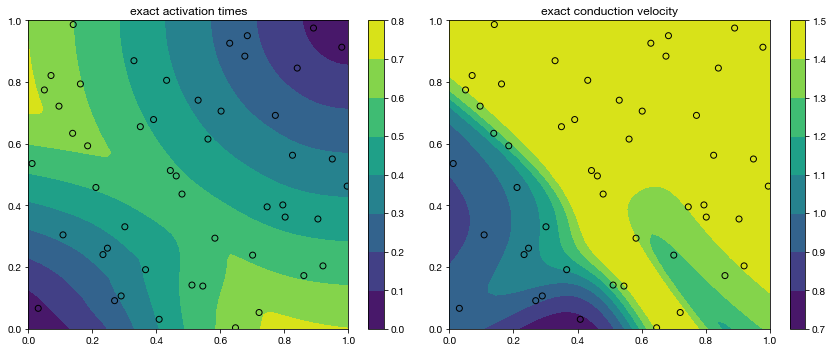

In [19]:
T_star, CV_star = model.predict(X,Y)

fig = plt.figure()
fig.set_size_inches((12,5))
plt.subplot(121)
plt.contourf(X_m, Y_m, T_star.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k') 
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('predicted activation times')

plt.subplot(122)
plt.contourf(X_m, Y_m, CV_star.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k') 
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('predicted conduction velocity')
     
plt.tight_layout()